<div class="alert alert-info">
    <h1>
        <center>
            <font color=#FF2E63> DIABETES PREDICTION USING LOGISTIC REGRESSION.</font>
        </center>
    </h1>
</div>

## <span style='color:#FF2E63'>|</span><font> Introduction<font>

Diabetes, is a group of metabolic disorders in which there are high blood sugar levels over a prolonged period. Symptoms of high blood sugar include frequent urination, increased thirst, and increased hunger. If left untreated, diabetes can cause many complications. Acute complications can include diabetic ketoacidosis, hyperosmolar hyperglycemic state, or death. Serious long-term complications include cardiovascular disease, stroke, chronic kidney disease, foot ulcers, and damage to the eyes.

## <span style='color:#FF2E63'>|</span><font> Objective <font>
    
This notebook intends to explore the dataset as well as predict the overall risk of diabetes using logistic regression.

## <span style='color:#FF2E63'>|</span><font> Contents <font>

<hr style="border:1px solid #FF2E63;" />

## <b>1 <span style='color: #FF2E63'>|</span><font> Importing libraries<font>

In [1]:
# For getting data ready
import pandas as pd

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# For Data Preparation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# For Testing
from sklearn.metrics import accuracy_score

# For generating random seed
import numpy as np
import random as rnd

np.random.seed(42)

<hr style="border:1px solid #FF2E63;" />

## <b>2 <span style='color:#FF2E63'>|</span><font> Data Exploration <font>

### <font color=red>Source:<font>

The dataset is publically available on the Kaggle website.The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. In particular, all patients here are females at least 21 years old of Pima Indian heritage.The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.
    
#### SOURCE : https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
    
<br>
    

---

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


---

### 2.1 <span style='color:#FF2E63'>|</span><font> Feature Columns Annotation <font>

<br>

 - **<font color=SteelBlue>Feature Columns:<font>**
    
     - Pregnancies: Number of times pregnant
     - Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
     - BloodPressure: Diastolic blood pressure (mm Hg)
     - SkinThickness: Triceps skin fold thickness (mm)
     - Insulin: 2-Hour serum insulin (mu U/ml)
     - BMI: Body mass index (weight in kg/(height in m)^2)
     - DiabetesPedigreeFunction: Diabetes pedigree functionr
     - Age: Age (years)
     - Cabin : Cabin Number

    
 - **<font color=SteelBlue>Target variable :<font>**
    
     - Outcome: Class variable (0 or 1)
         - 0 : no disease
         - 1 : disease

---

### 2.2 <span style='color:#FF2E63'>|</span><font> Data Insights <font>

<br>

In [3]:
df.shape

(768, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [8]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [9]:
col=['Glucose' ,'BloodPressure' ,'SkinThickness', 'Insulin' ,'BMI']

In [10]:
for i in col:
  df[i].replace(0,df[i].mean(),inplace=True)

<hr style="border:1px solid #FF2E63;" />

## <b>3 <span style='color:#FF2E63'>|</span><font> Data Visualization <font>
    
<br>

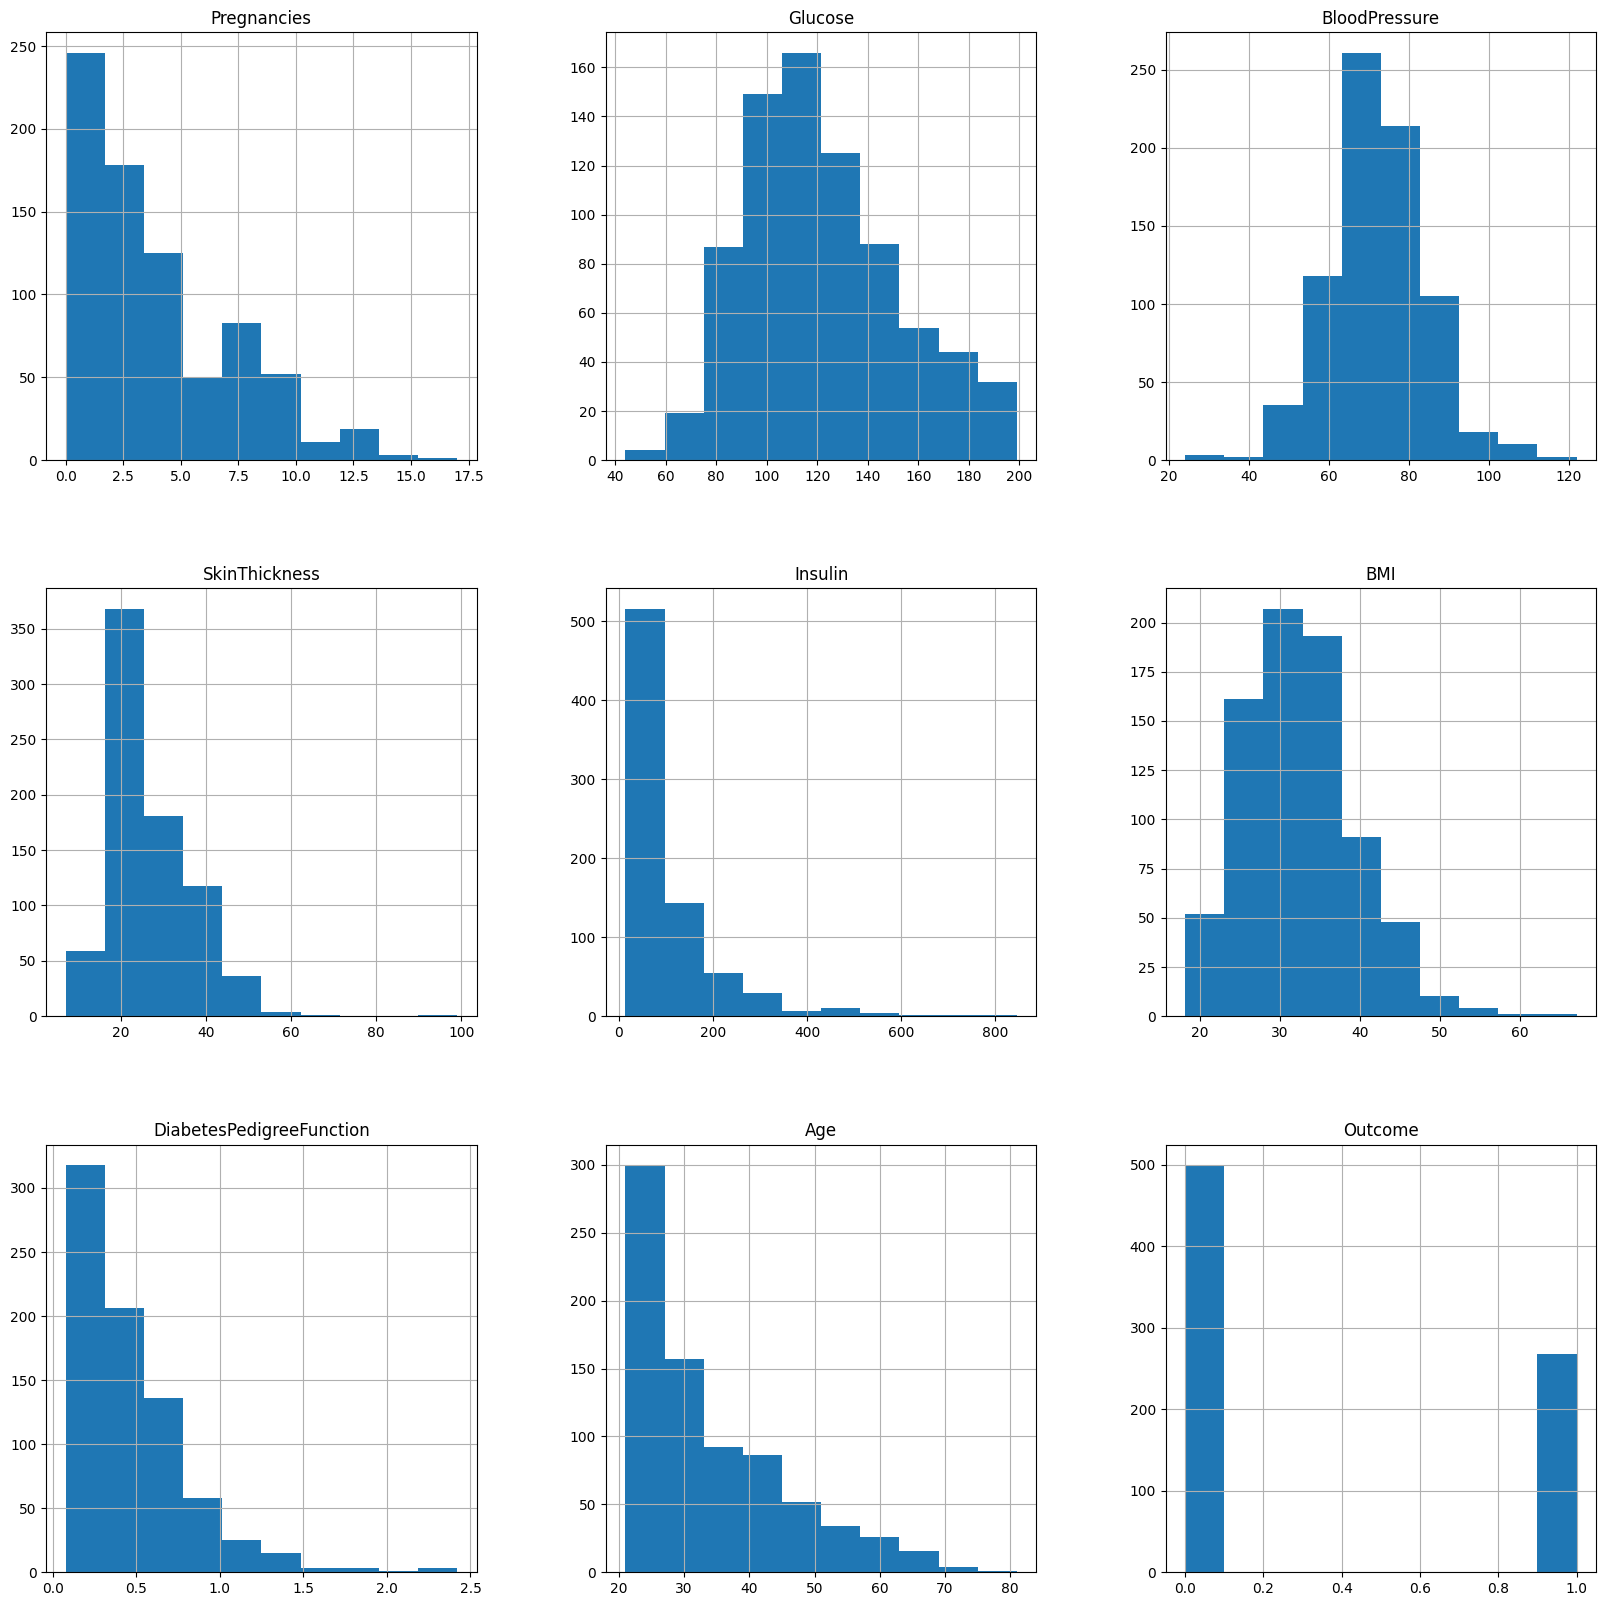

In [11]:
p=df.hist(figsize = (20,20))

<AxesSubplot: xlabel='Outcome', ylabel='Age'>

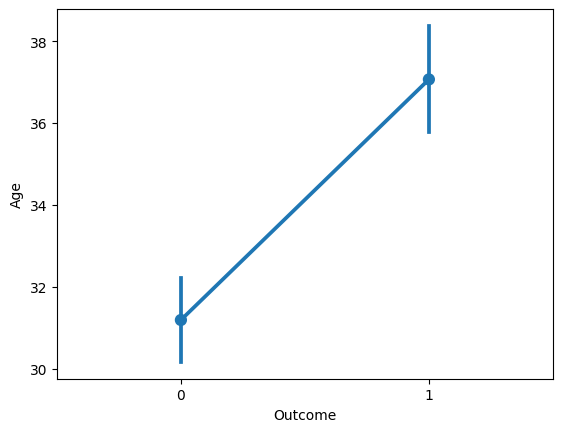

In [12]:
sns.pointplot(x='Outcome', y= 'Age', data=df)

<hr style="border:1px solid #FF2E63;" />

## <b>4 <span style='color:#FF2E63'>|</span><font> Data Preparation for Machine Learning <font>

### 4.1 <span style='color:#FF2E63'>|</span><font> Splitting Data - X(***labels***) And Y (***target***)<font>

<br>

In [13]:
X = df.drop(columns = 'Outcome', axis=1)
Y = df['Outcome']

### 4.2 <span style='color:#FF2E63'>|</span><font> Data Standardization <font>

<br>

In [14]:
scaler = StandardScaler()

In [15]:
scaler.fit(X)

StandardScaler()

In [16]:
standardized_data = scaler.transform(X)

In [17]:
X = standardized_data
Y = df['Outcome']

### 4.2 <span style='color:#FF2E63'>|</span><font> Splitting Data - Training Data & Testing Data <font>

<br>

In [18]:
#splitting the dataset
from sklearn.model_selection import train_test_split 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

<hr style="border:1px solid #FF2E63;" />

## <b>5 <span style='color:#FF2E63'>|</span><font> Models <font>

### 5.1 <span style='color:#FF2E63'>|</span><font> Logistic Regression <font>

<br>

In [19]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,Y_train)

log_acc=accuracy_score(Y_test,log_reg.predict(X_test))


print("Train Set Accuracy:"+str(accuracy_score(Y_train,log_reg.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,log_reg.predict(X_test))*100))

Train Set Accuracy:76.8729641693811
Test Set Accuracy:81.81818181818183


### 5.2 <span style='color:#FF2E63'>|</span><font> KNeighborsClassifier <font>

<br>

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()                #knn classifier
knn.fit(X_train,Y_train)

knn_acc = accuracy_score(Y_test,knn.predict(X_test))


print("Train Set Accuracy:"+str(accuracy_score(Y_train,knn.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,knn.predict(X_test))*100))

Train Set Accuracy:80.29315960912052
Test Set Accuracy:77.27272727272727


### 5.3 <span style='color:#FF2E63'>|</span><font> Support Vector Classifier <font>

<br>

In [21]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train,Y_train)    

svm_acc= accuracy_score(Y_test,svm.predict(X_test))


print("Train Set Accuracy:"+str(accuracy_score(Y_train,svm.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,svm.predict(X_test))*100))

Train Set Accuracy:81.59609120521174
Test Set Accuracy:77.27272727272727


### 5.4 <span style='color:#FF2E63'>|</span><font> Decision Tree Classifier <font>

<br>

In [22]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)


dtc_acc= accuracy_score(Y_test,dtc.predict(X_test))

print("Train Set Accuracy:"+str(accuracy_score(Y_train,dtc.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,dtc.predict(X_test))*100))

Train Set Accuracy:100.0
Test Set Accuracy:79.22077922077922


### 5.5 <span style='color:#FF2E63'>|</span><font> Random Forest Classifier <font>

<br>

In [23]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)


rfc_acc= accuracy_score(Y_test,rfc.predict(X_test))

print("Train Set Accuracy:"+str(accuracy_score(Y_train,dtc.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,dtc.predict(X_test))*100))

Train Set Accuracy:100.0
Test Set Accuracy:79.22077922077922


### 5.6 <span style='color:#FF2E63'>|</span><font> Gradient Boosting Classifier <font>

<br>

In [24]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(X_train, Y_train)


gbc_acc=accuracy_score(Y_test,gbc.predict(X_test))

print("Train Set Accuracy:"+str(accuracy_score(Y_train,gbc.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,gbc.predict(X_test))*100))

Train Set Accuracy:92.34527687296416
Test Set Accuracy:79.87012987012987


### 5.7 <span style='color:#FF2E63'>|</span><font> Overview <font>

<br>

In [25]:
models = pd.DataFrame({
    'Model': ['Logistic','KNN', 'SVC',  'Decision Tree Classifier', 'Random Forest Classifier',
             'Gradient Boosting Classifier'],
    'Score': [ log_acc,knn_acc, svm_acc, dtc_acc, rfc_acc, gbc_acc,]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
0,Logistic,0.818182
4,Random Forest Classifier,0.811688
5,Gradient Boosting Classifier,0.798701
3,Decision Tree Classifier,0.792208
1,KNN,0.772727
2,SVC,0.772727


<hr style="border:1px solid #FF2E63;" />

## <b>6 <span style='color:#FF2E63'>|</span><font> Making a Predictive System <font>

Going with __Logistic Regression__ model as it has the highest Score on Test Data.

In [28]:
input_data = (1,103,30,38,83,43.3,0.183,33)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)

prediction = log_reg.predict(std_data)

if (prediction[0] == 0):
    print(prediction)
    print('The person is not diabetic')
else:
    print(prediction)
    print('The person is diabetic')

[0]
The person is not diabetic


<hr style="border:1px solid #FF2E63;" />

## <b>7 <span style='color:#FF2E63'>|</span><font> Saving Trained Model<font>

In [27]:
import pickle

filename = 'diabetes_model.sav'
pickle.dump(log_reg, open(filename, 'wb'))